<a href="https://colab.research.google.com/github/Chao-Meng/python-column-chart/blob/main/Group7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
path="/content/supermarket_sales.csv"

In [ ]:
df=pd.read_csv(path)

In [ ]:
#Load SQL into Colabs
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [ ]:
# Create a connection to an in-memory SQLite database
conn = sqlite3.connect(':memory:')

In [ ]:
# List all tables in the database
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('market',)]


In [ ]:
# Write the DataFrame to a table in the SQLite database
df.to_sql('market', conn, index=False)

1000

In [ ]:
# Close the connection
conn.close()

In [ ]:
# Reconnect to the SQLite database
conn = sqlite3.connect(':memory:')

In [ ]:
# Use SQL magic function to execute SQL queries
%sql sqlite://

In [ ]:
%sql SELECT * FROM 'market';

 * sqlite://
(sqlite3.OperationalError) no such table: market
[SQL: SELECT * FROM 'market' ;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df.shape

(1000, 17)

In [ ]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Checking if all the values of "gross margin percentage" is all 4.7

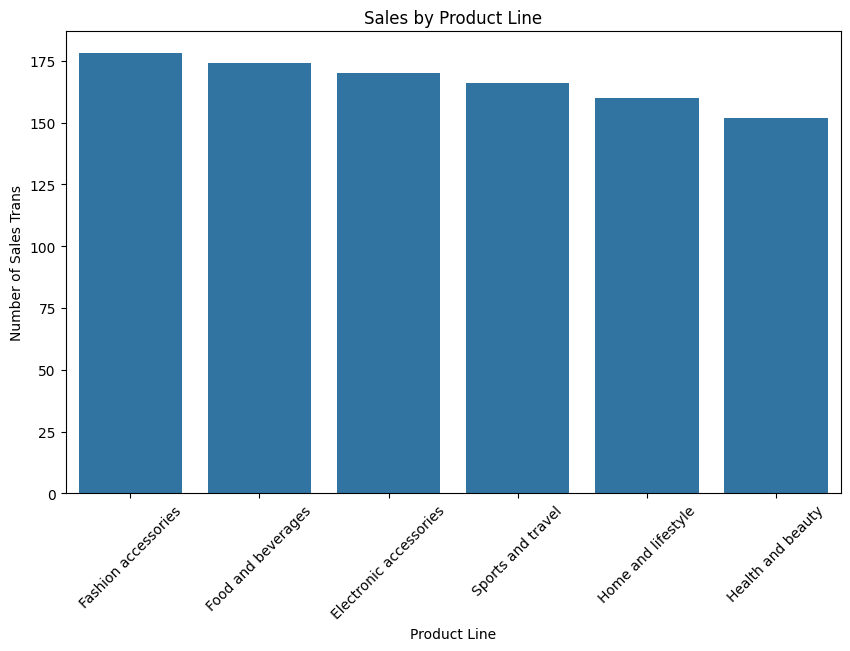

In [ ]:
# using seaborn to generate the chart
counts = df['Product line'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product line',order=counts.index)
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Number of Sales Trans')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

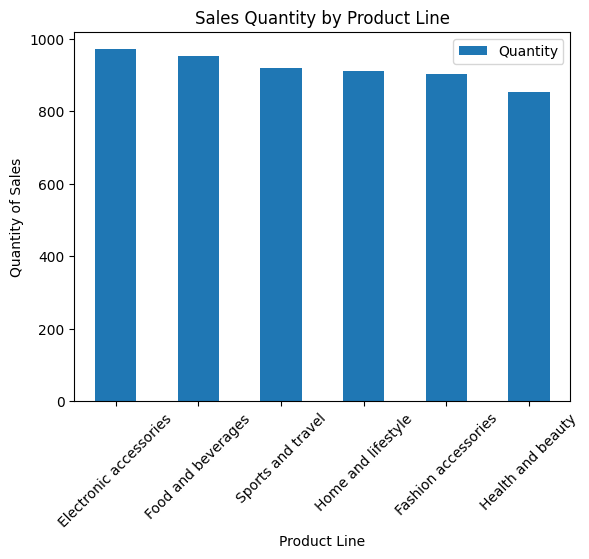

In [ ]:
# using matplotlib
plt.figure(figsize=(10, 6))
#product_sales = df['Product line'].value_counts()
#product_sales=df.groupby('Product line')['Quantity'].sum()
product_sales=df.groupby('Product line')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
product_sales.plot(kind='bar',x='Product line')
plt.title('Sales Quantity by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Quantity of Sales')
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
# group the data and calculate the ledger, then reset the index so we get a new DataFrame
sales_by_product_line = df.groupby('Product line')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

# create new column with new DataFrame
fig = px.bar(sales_by_product_line, x='Product line', y='Total', title='Total Sales by Product Line')
fig.update_xaxes(title_text='Product Line')
fig.update_yaxes(title_text='Total Sales')
fig.show()
